In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [12]:
with open("/home/mazz/Desktop/github/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [13]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:
tokenizer =Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

In [10]:
word_index = tokenizer.word_index

In [15]:

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [18]:
# training_padded

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6622 - accuracy: 0.5962 - val_loss: 0.5625 - val_accuracy: 0.7989
Epoch 2/30
625/625 - 2s - loss: 0.4161 - accuracy: 0.8332 - val_loss: 0.3757 - val_accuracy: 0.8444
Epoch 3/30
625/625 - 2s - loss: 0.3040 - accuracy: 0.8772 - val_loss: 0.3469 - val_accuracy: 0.8562
Epoch 4/30
625/625 - 2s - loss: 0.2533 - accuracy: 0.8997 - val_loss: 0.3389 - val_accuracy: 0.8569
Epoch 5/30
625/625 - 2s - loss: 0.2169 - accuracy: 0.9158 - val_loss: 0.3661 - val_accuracy: 0.8430
Epoch 6/30
625/625 - 2s - loss: 0.1908 - accuracy: 0.9281 - val_loss: 0.3563 - val_accuracy: 0.8547
Epoch 7/30
625/625 - 2s - loss: 0.1706 - accuracy: 0.9352 - val_loss: 0.3692 - val_accuracy: 0.8542
Epoch 8/30
625/625 - 2s - loss: 0.1510 - accuracy: 0.9442 - val_loss: 0.3820 - val_accuracy: 0.8566
Epoch 9/30
625/625 - 2s - loss: 0.1359 - accuracy: 0.9524 - val_loss: 0.4026 - val_accuracy: 0.8550
Epoch 10/30
625/625 - 2s - loss: 0.1241 - accuracy: 0.9555 - val_loss: 0.4324 - val_accuracy: 0.8490

In [22]:
import matplotlib.pyplot as plt


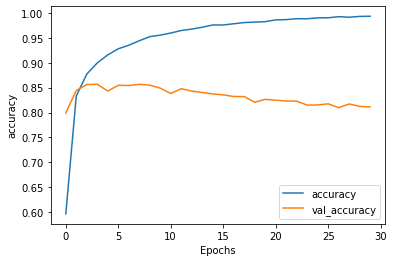

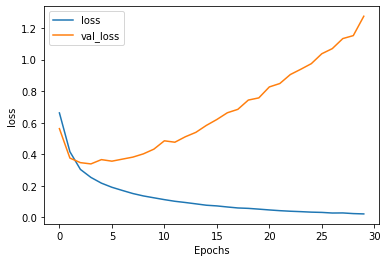

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [28]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [30]:
# reverse_word_index